In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer


In [2]:
df = pd.read_csv("cleaned_crime_data.csv")

In [3]:
print("Dataset Overview:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

Dataset Overview:
       States/UTs       District  Year  Murder  RAPE  THEFT  DOWRY DEATHS
0  ANDHRA PRADESH       ADILABAD  2001     101    50    199            16
1  ANDHRA PRADESH      ANANTAPUR  2001     151    23    366             7
2  ANDHRA PRADESH       CHITTOOR  2001     101    27    723            14
3  ANDHRA PRADESH       CUDDAPAH  2001      80    20    173            17
4  ANDHRA PRADESH  EAST GODAVARI  2001      82    23   1021            12

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9017 entries, 0 to 9016
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   States/UTs    9017 non-null   object
 1   District      9017 non-null   object
 2   Year          9017 non-null   int64 
 3   Murder        9017 non-null   int64 
 4   RAPE          9017 non-null   int64 
 5   THEFT         9017 non-null   int64 
 6   DOWRY DEATHS  9017 non-null   int64 
dtypes: int64(5), object(2)
memo

In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
States/UTs      0
District        0
Year            0
Murder          0
RAPE            0
THEFT           0
DOWRY DEATHS    0
dtype: int64


In [5]:
# Feature engineering: Create a total crime column
df['Total_Crime'] = df['Murder'] + df['RAPE'] + df['THEFT']
print("\nAdded Total Crime Feature:")
print(df[['States/UTs', 'District', 'Year', 'Total_Crime']].head())


Added Total Crime Feature:
       States/UTs       District  Year  Total_Crime
0  ANDHRA PRADESH       ADILABAD  2001          350
1  ANDHRA PRADESH      ANANTAPUR  2001          540
2  ANDHRA PRADESH       CHITTOOR  2001          851
3  ANDHRA PRADESH       CUDDAPAH  2001          273
4  ANDHRA PRADESH  EAST GODAVARI  2001         1126


In [6]:
# Visualization of crime distribution
plt.figure(figsize=(15, 10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

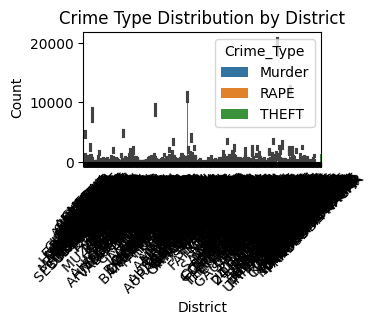

In [7]:
# Visualize crime types distribution by district
plt.subplot(2, 2, 1)
crime_data = df.melt(id_vars=['District'], value_vars=['Murder', 'RAPE', 'THEFT'], var_name='Crime_Type', value_name='Count')
sns.barplot(x='District', y='Count', hue='Crime_Type', data=crime_data)
plt.title('Crime Type Distribution by District')
plt.xticks(rotation=45)
plt.tight_layout()

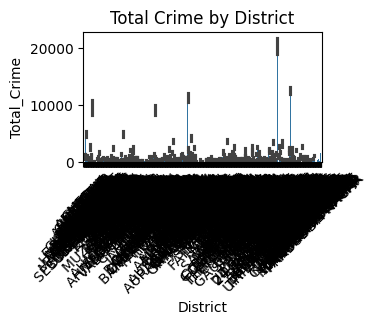

In [8]:
# Visualize total crime by district
plt.subplot(2, 2, 2)
sns.barplot(x='District', y='Total_Crime', data=df)
plt.title('Total Crime by District')
plt.xticks(rotation=45)
plt.tight_layout()

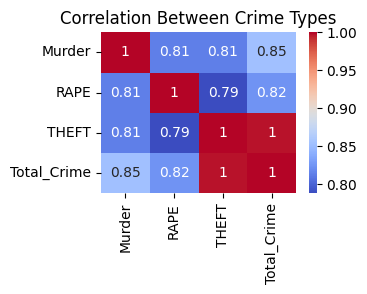

In [9]:
# Correlation heatmap
plt.subplot(2, 2, 3)
crime_cols = ['Murder', 'RAPE', 'THEFT', 'Total_Crime']
correlation = df[crime_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Crime Types')
plt.tight_layout()

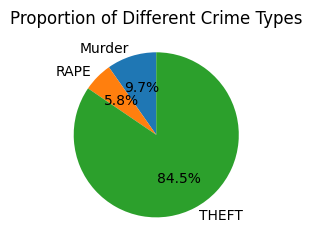

In [10]:
# Pie chart of crime types
plt.subplot(2, 2, 4)
crime_sums = [df['Murder'].sum(), df['RAPE'].sum(), df['THEFT'].sum()]
plt.pie(crime_sums, labels=['Murder', 'RAPE', 'THEFT'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Different Crime Types')
plt.tight_layout()

In [11]:
plt.savefig('crime_visualization.png')
plt.close()

print("\nVisualizations created and saved to 'crime_visualization.png'")



Visualizations created and saved to 'crime_visualization.png'


In [12]:
# K-means Clustering Analysis
print("\nPerforming K-means Clustering...")

# Prepare data for clustering
X_cluster = df[['Murder', 'RAPE', 'THEFT']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


Performing K-means Clustering...


In [13]:
# Determine optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, min(6, len(df) + 1))  # Adjusted to handle small sample size
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('elbow_method.png')
plt.close()

In [14]:
# Apply K-means with the optimal number of clusters
# For this small dataset, let's use 2 clusters
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(f"\nK-means clustering completed with {optimal_k} clusters")
print(df[['District', 'Murder', 'RAPE', 'THEFT', 'Cluster']].head())


K-means clustering completed with 2 clusters
        District  Murder  RAPE  THEFT  Cluster
0       ADILABAD     101    50    199        0
1      ANANTAPUR     151    23    366        0
2       CHITTOOR     101    27    723        0
3       CUDDAPAH      80    20    173        0
4  EAST GODAVARI      82    23   1021        0


In [15]:
# Visualize the clusters (using PCA for dimensionality reduction)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Crime Clusters Visualization using PCA')
for i, txt in enumerate(df['District']):
    plt.annotate(txt, (principal_components[i, 0], principal_components[i, 1]))
plt.savefig('crime_clusters.png')
plt.close()

In [16]:
# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster')[['Murder', 'RAPE', 'THEFT']].mean()
print("\nCluster Characteristics:")
print(cluster_analysis)


Cluster Characteristics:
              Murder         RAPE         THEFT
Cluster                                        
0          51.003506    30.977604    436.153489
1        2012.295455  1161.369318  17869.471591


In [17]:
# Create a plotting function for cluster characteristics
plt.figure(figsize=(12, 8))
cluster_analysis.T.plot(kind='bar')
plt.title('Average Crime Rates by Cluster')
plt.ylabel('Average Number of Cases')
plt.xlabel('Crime Type')
plt.legend(title='Cluster')
plt.savefig('cluster_characteristics.png')
plt.close()

<Figure size 1200x800 with 0 Axes>

In [18]:
# Predictive Modeling with Random Forest
print("\nTraining Random Forest Regressor for crime prediction...")

# Note: In reality, we would need more data points and time series data for meaningful prediction
# This is a demonstration with a very limited dataset

# For demonstration purposes, let's try to predict total crime from other features
X = df[['Murder', 'RAPE']]  # Using murder and rape to predict theft
y = df['THEFT']


Training Random Forest Regressor for crime prediction...


In [19]:

# Since the dataset is small, we will use a simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

In [20]:
# Model evaluation
print("\nRandom Forest Model Evaluation:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

# Feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting THEFT')
plt.savefig('feature_importance.png')
plt.close()


Random Forest Model Evaluation:
Mean Squared Error: 2076273.83
R² Score: 0.82

Feature Importance:
  Feature  Importance
0  Murder     0.74638
1    RAPE     0.25362


In [21]:

# Future prediction simulation
print("\nSimulating Future Crime Prediction...")

# Create a hypothetical future scenario
# In reality, this would use time series forecasting methods with more historical data
new_data = pd.DataFrame({
    'Murder': [100, 120, 90, 85, 95],
    'RAPE': [30, 25, 28, 22, 24]
})

# Use the trained model to predict theft
predicted_theft = rf_model.predict(new_data)

# Create a dataframe with the predictions
future_predictions = pd.DataFrame({
    'Murder': new_data['Murder'],
    'RAPE': new_data['RAPE'],
    'Predicted_THEFT': predicted_theft
})

print("\nFuture Crime Predictions:")
print(future_predictions)

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.scatter(range(len(future_predictions)), future_predictions['Predicted_THEFT'], color='red', label='Predicted Theft')
plt.plot(range(len(future_predictions)), future_predictions['Predicted_THEFT'], color='red')
plt.title('Predicted THEFT Cases for Hypothetical Scenarios')
plt.xlabel('Scenario Number')
plt.ylabel('Number of THEFT Cases')
plt.legend()
plt.savefig('future_predictions.png')
plt.close()


Simulating Future Crime Prediction...

Future Crime Predictions:
   Murder  RAPE  Predicted_THEFT
0     100    30      1055.813333
1     120    25       462.306833
2      90    28       754.340000
3      85    22       299.444000
4      95    24       543.890000


In [22]:

# Conclusion
print("\nAnalysis Conclusion:")
print("1. The dataset provided contains crime statistics for districts in Andhra Pradesh for the year 2001.")
print("2. K-means clustering identified distinct crime patterns among the districts.")
print("3. The Random Forest model shows relationships between different crime types.")
print("4. For more accurate predictions, a larger dataset with temporal information would be needed.")
print("5. Feature importance analysis reveals which crime indicators are most predictive of others.")

print("\nNotes on improving the analysis with a more complete dataset:")
print("1. Include multiple years of data to analyze crime trends over time")
print("2. Include socioeconomic factors that might influence crime rates")
print("3. Use time series analysis for more accurate future predictions")
print("4. Consider spatial analysis to understand geographical patterns of crime")
print("5. Include more features for better clustering and predictive performance")


Analysis Conclusion:
1. The dataset provided contains crime statistics for districts in Andhra Pradesh for the year 2001.
2. K-means clustering identified distinct crime patterns among the districts.
3. The Random Forest model shows relationships between different crime types.
4. For more accurate predictions, a larger dataset with temporal information would be needed.
5. Feature importance analysis reveals which crime indicators are most predictive of others.

Notes on improving the analysis with a more complete dataset:
1. Include multiple years of data to analyze crime trends over time
2. Include socioeconomic factors that might influence crime rates
3. Use time series analysis for more accurate future predictions
4. Consider spatial analysis to understand geographical patterns of crime
5. Include more features for better clustering and predictive performance
